In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in data then merge 
counts = pd.read_csv('/Users/stevennguyen/Projects/Cancer-Subset-Predictor-/data/data.csv')
labels = pd.read_csv('/Users/stevennguyen/Projects/Cancer-Subset-Predictor-/data/labels.csv')
data = pd.merge(counts, labels)
data.head()


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [3]:
data.shape

(801, 20533)

Text(0.5, 1.0, 'Distribution of Cancer Subtypes')

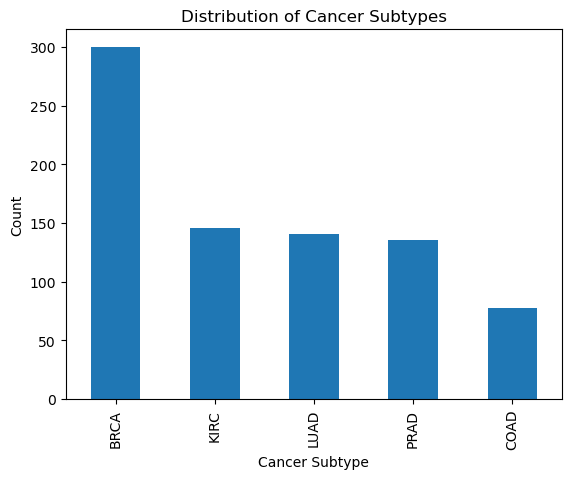

In [4]:
#check how many cancer subtypes we have 
data['Class'].value_counts().plot(kind='bar')
plt.xlabel('Cancer Subtype')
plt.ylabel('Count')
plt.title('Distribution of Cancer Subtypes')

In [10]:
#check for missing values
data.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

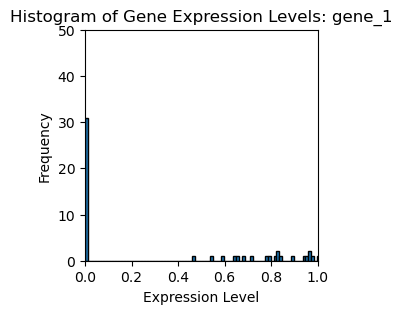

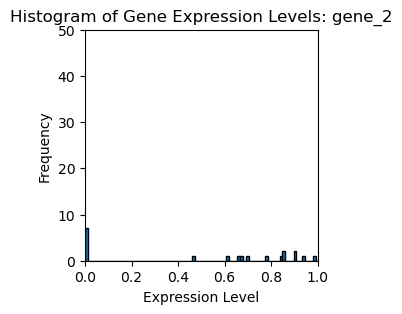

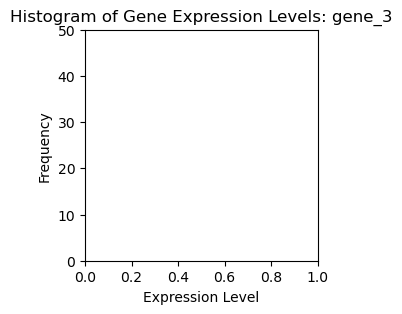

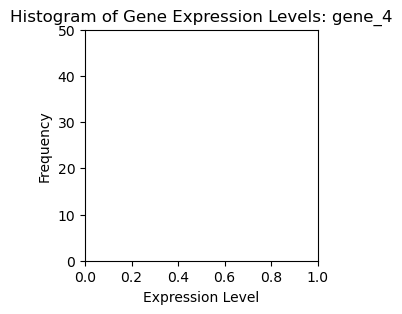

In [5]:
#histogram of gene expression values

def histogram_of_gene_expression(data_col):
    gene_name = data.columns[i]
    plt.figure(figsize=(3, 3))
    plt.hist(data_col.values.flatten(), bins=500, edgecolor='black')
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')
    plt.title('Histogram of Gene Expression Levels: ' + gene_name)
    plt.xlim(0, 1)
    plt.ylim(0, 50)
    plt.show()

for i in range(2,6):
    histogram_of_gene_expression(data.iloc[1:801, i])

In [6]:
#summary statistics for first 15 genes
# Summary statistics for gene expression columns
data.iloc[1:, 1:-1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gene_0,800.0,0.026675,0.136932,0.000000,0.000000,0.000000,0.000000,1.482332
gene_1,800.0,3.012152,1.201064,0.000000,2.301060,3.144095,3.883591,6.237034
gene_2,800.0,3.095137,1.066251,0.000000,2.388503,3.120620,3.802620,6.063484
gene_3,800.0,6.723860,0.637700,5.009284,6.303883,6.657481,7.039283,10.129528
gene_4,800.0,9.812839,0.506381,8.435999,9.462924,9.791280,10.142056,11.355621
...,...,...,...,...,...,...,...,...
gene_20526,800.0,11.741902,0.670727,9.045255,11.315846,11.749285,12.178402,13.715361
gene_20527,800.0,10.155901,0.580658,7.530141,9.836626,10.192114,10.578651,11.675653
gene_20528,800.0,9.591563,0.563704,7.864533,9.245984,9.567456,9.918108,12.813320
gene_20529,800.0,5.528478,2.075139,0.593975,4.091012,5.213905,6.881820,11.205836


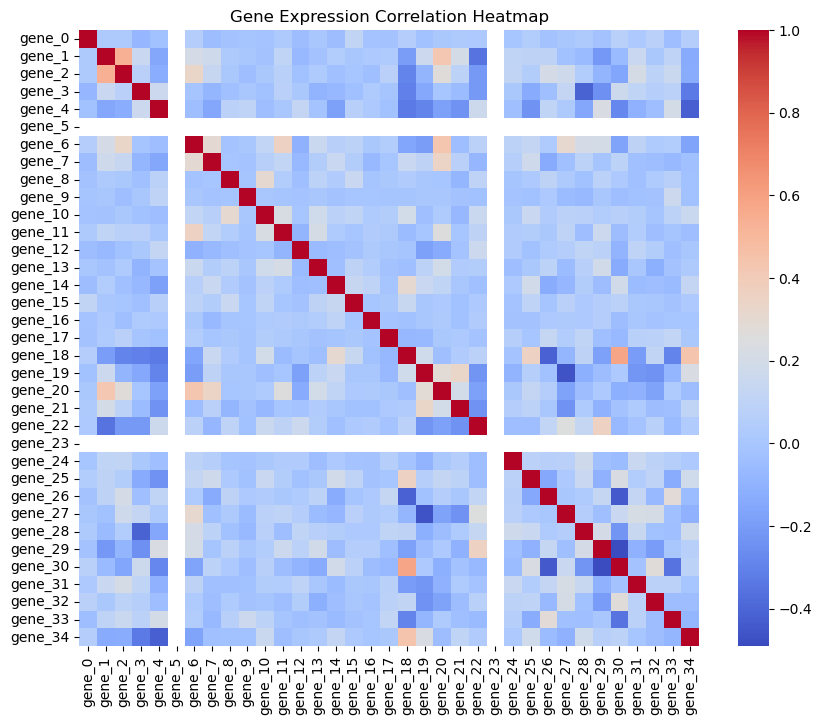

In [ ]:
#correlation heatmap of first 35 genes
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data.iloc[1:, 1:36].corr(), cmap='coolwarm')
plt.title('Gene Expression Correlation Heatmap')
plt.show()